# 4.  La mesure

PennyLane peut extraire différents types de [résultats de mesures](https://docs.pennylane.ai/en/stable/introduction/measurements.html) à partir d'une machine quantique : la valeur moyenne d'une observable, sa variance, des échantillons d'une mesure unique ou des probabilités d'état de base de calcul.

On retrouve les différentes fonctions de mesures telles que

*   `qml.expval()`
*   `qml.var()`
*   `qml.sample()`
*   `qml.counts()`
*   `qml.probs()`
*   `qml.density_matrix()`


Comme mentionné précédement, on peut aussi retourner l'état dans la base de calcul avec `qml.state()`.

## Valeur moyenne et variance d'un observable

In [13]:
import pennylane as qml
from pennylane import numpy as np

from grader import *

In [14]:
!pip install qiskit

from qiskit.quantum_info import Statevector

In [15]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)
def circuit_expval(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliY(0))

Nous retournons ici la valeur moyenne `qml.expval()` de l'opérateur $Y$ appliqué au premier qubit. Plus précisément, cela signifie que nous calculons $\langle \psi \vert Y \vert \psi \rangle$, où $\vert \psi \rangle$ est le vecteur de dimension $2^n$ généré par le circuit ($n$ étant le nombre de qubits) et $Y$ est un opérateur qui agit uniquement sur le premier qubit. Lorsque nous exécutons le circuit pour $\theta=0.5$, nous obtenons un nombre qui correspond exactement à cette valeur moyenne en sortie.

In [16]:
circuit_expval(0.5)

tensor(-0.47942554, requires_grad=True)

Nous pouvons également retourner la variance d'un observable, `qml.var()`

In [17]:
@qml.qnode(dev)
def circuit_var(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.var(qml.PauliY(0))

circuit_var(0.5)

tensor(0.77015115, requires_grad=True)

## Échantillons et probabilités

En réalité, dans une expérience, nous obtenons généralement un ensemble de mesures réelles échantillonnées à partir des probabilités de la fonction d'onde. Dans ce cas, la fonction d'onde réelle n'est pas accessible, mais encore une fois, nous pouvons "tricher" car nous simulons notre circuit de manière classique.

Ainsi, si nous voulons imiter un ordinateur quantique, nous pouvons sortir un ensemble de mesures à partir de l'état résultant. Pour ce faire, nous utilisons la fonction `qml.sample()`, pour laquelle nous devons spécifier le nombre d'échantillons ('shots') lors de la définition de la machine.

In [18]:
dev = qml.device("default.qubit", wires=2, shots=4)
@qml.qnode(dev)
def circuit_sample(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliY(0))

circuit_sample(0.5)


array([-1, -1, -1, -1])

Ici, PennyLane prend les valeurs propres λᵢ de l'observable et les échantillonne avec leurs probabilités associées p(λᵢ) = |⟨ξᵢ|ψ⟩|², où, |ξᵢ⟩ est l'état de base correspondant dans la base de l'observable.

Au lieu d'échantillonner à partir de la densité de probabilité de la fonction d'onde, nous pourrions être intéressés par l'obtention directe des probabilités de chaque état de la base de calcul. PennyLane nous permet de faire cela en utilisant la fonction `qml.probs()`.

In [19]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def circuit_probs(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])
Statevector(circuit_probs(0.5)).draw('latex')


<IPython.core.display.Latex object>

Nous obtenons des probabilités d'observation d'environ 47% pour les états |00⟩ et |01⟩ et 3% pour les états |10⟩ et |11⟩.


EXERCICE

---


Implémentez le circuit ci-dessous afin qu'il retourne la valeur moyenne de l'opérateur $Z$. Quelle est cette valeur moyenne? Calculez la explicitement puis comparez au résultat du circuit.

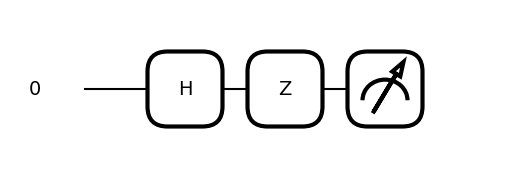

In [24]:
dev = qml.device('default.qubit', wires = 1)
@qml.qnode(dev)
def circuit():

    ##################
    # YOUR CODE HERE #
    ##################
    #qml.Hadamard(wires = 0)
    #qml.Z(wires = 0)

    return #qml.expval(qml.Z(wires = 0))
print(circuit())

0.0


In [25]:
#DO NOT EDIT THIS CELL
ans = Answer(dev, circuit)
grade(exercise_expval, ans)

Checking exercise: Expectation Value
Correct


Dans le dernier exercice vous avez calculé la valeur moyenne analytiquement. Sur du vrai matériel quantique, la nature probabiliste du calcul quantique nous force plutôt à faire des échantillonages répétés afin de calculer la valeur moyenne.

Considérez le même circuit mais testez le avec plusieurs nombre d'échantillons ('shots'). Quelles sont les valeurs possibles après un seul échantillonage? Que se passe-t-il quand vous augmentez le nombre d'échantillons?

In [37]:
#Adapté du Codebook I.10.2
resultats = []

# Différentes nombre d'échantillonage
n_echantillons = [1, 100, 1000, 10000, 100000]
for n in n_echantillons:
    dev = qml.device('default.qubit', wires = 1, shots = n)
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires = 0)
        qml.Z(wires = 0)
        return qml.expval(qml.Z(wires = 0))
    resultats.append(circuit())

print(resultats)

[tensor(-1., requires_grad=True), tensor(-0.08, requires_grad=True), tensor(-0.062, requires_grad=True), tensor(0.0036, requires_grad=True), tensor(-0.00578, requires_grad=True)]


## États et matrice de densité
  

La mesure `qml.state()` nous donne la sortie la plus complète possible, c'est-à-dire la fonction d'onde complète dans la base de calcul. Elle n'accepte aucun observable et renvoie un état pur.

In [ ]:
@qml.qnode(dev)
def circuit_state(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.state()


Statevector(circuit_state(0.5)).draw('latex')


<IPython.core.display.Latex object>

Nous pourrions aussi être intéressés par l'obtention de la matrice de densité dans la base de calcul. Dans ce cas, nous pouvons utiliser `qml.density_matrix()`.

In [ ]:
@qml.qnode(dev)
def circuit_density_matrix(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.density_matrix(wires=0)

circuit_density_matrix(0.5)


tensor([[0.93879128+0.j        , 0.        +0.23971277j],
        [0.        -0.23971277j, 0.06120872+0.j        ]], requires_grad=True)